In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
# from matplotlib import pyplot as plt
# import numpy as np
# import scipy as sp
# import seaborn as sns
# import pandas as pds
# from Bio import SeqIO

from src.align import *
from src.helper import *

In [113]:
input_file = "/Users/serenaong/Documents/csc121_project/data/chr11_transcriptome.fasta"
reads_file = "/Users/serenaong/Documents/csc121_project/data/reads.fasta"

In [87]:
KMER_LENS = [21, 26, 31, 36, 41]

In [88]:
for kmer_len in KMER_LENS:
    kallisto = Kallisto(input_file, reads_file, kmer_len)
    kallisto.build_debrujin_graph()
    kallisto.process_reads_file()
    save_to_file(kallisto.equivalence_counts, kmer_len, False)


7138it [02:46, 42.88it/s] 


Successfully created index.


1282526it [24:36, 868.40it/s]



Saved to file.


7138it [01:39, 72.08it/s] 


Successfully created index.


1282526it [22:03, 968.84it/s] 



Saved to file.


7138it [01:44, 68.13it/s] 


Successfully created index.


1282526it [19:22, 1103.22it/s]



Saved to file.


7138it [01:37, 72.99it/s] 


Successfully created index.


1282526it [17:52, 1195.72it/s]



Saved to file.


7138it [01:38, 72.68it/s] 


Successfully created index.


1282526it [16:27, 1298.62it/s]


Saved to file.


In [83]:
gt = get_ground_truth(reads_file)
print(gt)

1282526it [00:06, 194737.44it/s]

{'ENST00000410108': 116, 'ENST00000325147': 187, 'ENST00000382762': 1381, 'ENST00000486280': 6, 'ENST00000526104': 1036, 'ENST00000325207': 580, 'ENST00000528357': 3, 'ENST00000526982': 4, 'ENST00000530889': 25, 'ENST00000527696': 482, 'ENST00000524854': 54, 'ENST00000529275': 2, 'ENST00000382743': 163, 'ENST00000529937': 5, 'ENST00000532837': 239, 'ENST00000524564': 24, 'ENST00000532956': 7, 'ENST00000526854': 4, 'ENST00000529055': 2, 'ENST00000530067': 2, 'ENST00000528469': 17, 'ENST00000525776': 12, 'ENST00000532097': 2875, 'ENST00000525665': 34, 'ENST00000352303': 36, 'ENST00000382671': 102, 'ENST00000526783': 36, 'ENST00000534750': 2, 'ENST00000409548': 343, 'ENST00000409655': 217, 'ENST00000409479': 344, 'ENST00000397660': 4, 'ENST00000382614': 1, 'ENST00000533141': 9, 'ENST00000616316': 238, 'ENST00000399817': 517, 'ENST00000680197': 1306, 'ENST00000680619': 12, 'ENST00000681833': 48, 'ENST00000680261': 72, 'ENST00000602569': 489, 'ENST00000527146': 94, 'ENST00000681211': 5, 'EN

In [102]:
files = ['/results/equiv_classes21', '/results/equiv_classes26', '/results/equiv_classes28', '/results/equiv_classes31', '/results/equiv_classes36', '/results/equiv_classes41']
stats = {21: None, 26: None, 28: None, 31: None, 36: None, 41: None}
for key, file in zip([21, 26, 28, 31, 36, 41], files):
    stats[key] = get_reads_stats('/Users/serenaong/Documents/csc121_project/' + file)

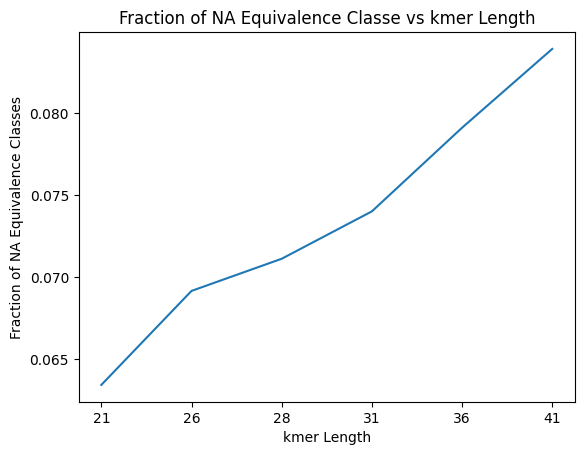

In [110]:
create_plot(1, range(6), [stat['percent_na'] for _, stat in stats.items()], 'kmer Length', 'Fraction of NA Equivalence Classes', 'Fraction of NA Equivalence Classe vs kmer Length', [21, 26, 28, 31, 36, 41])

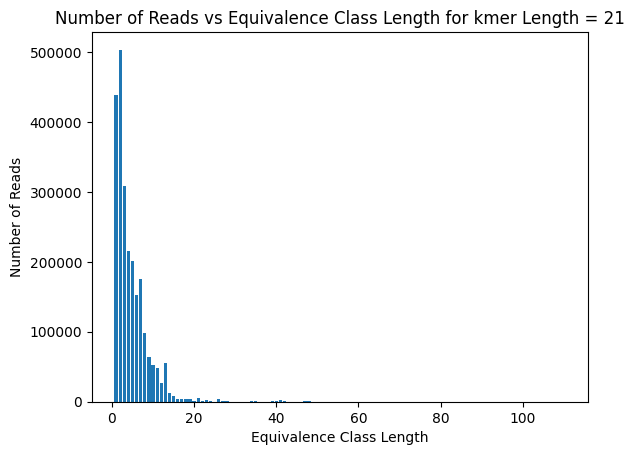

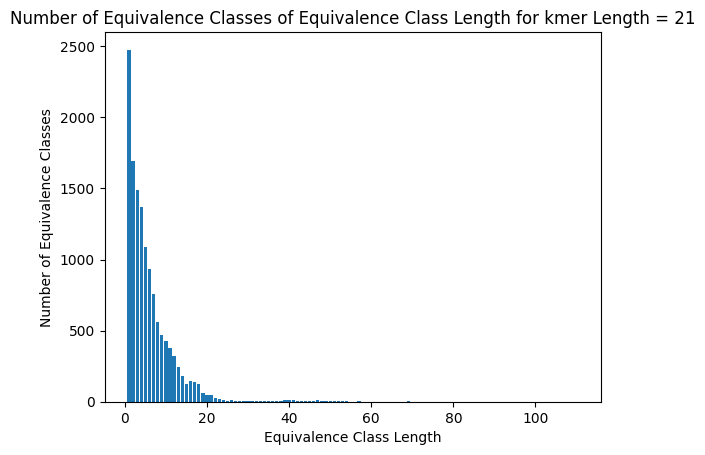

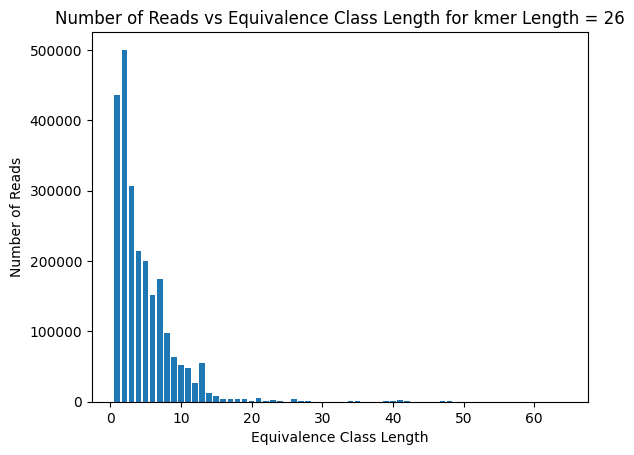

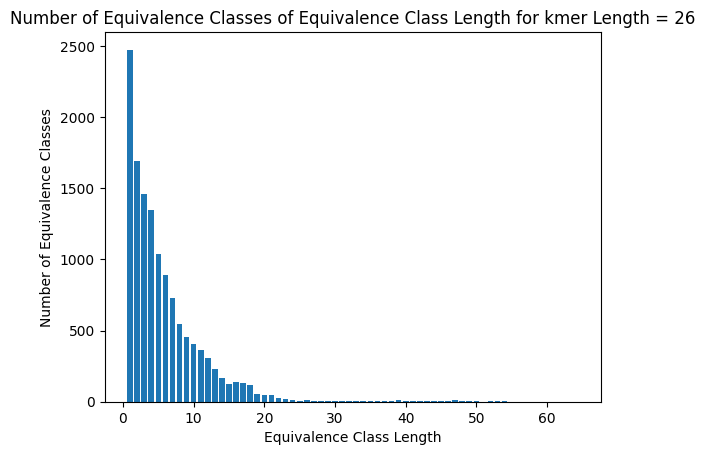

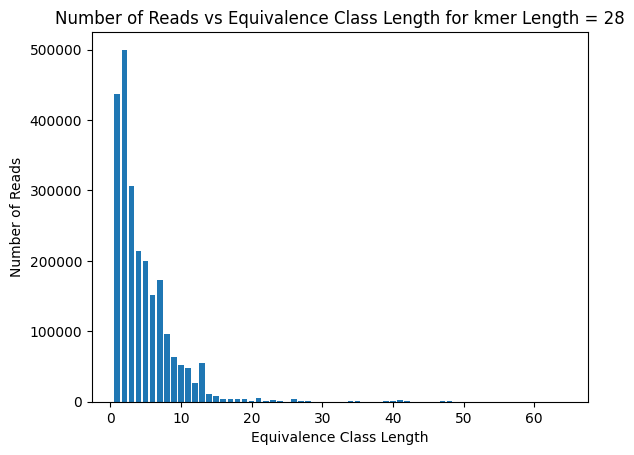

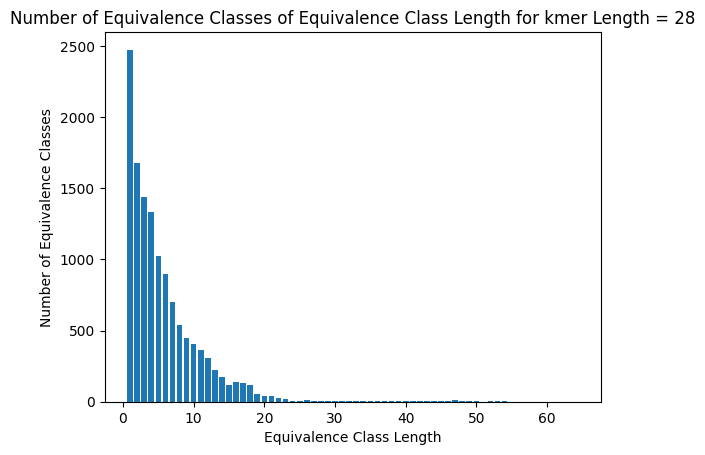

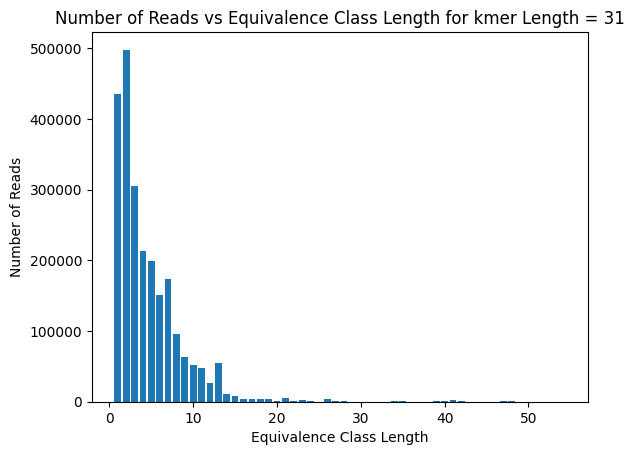

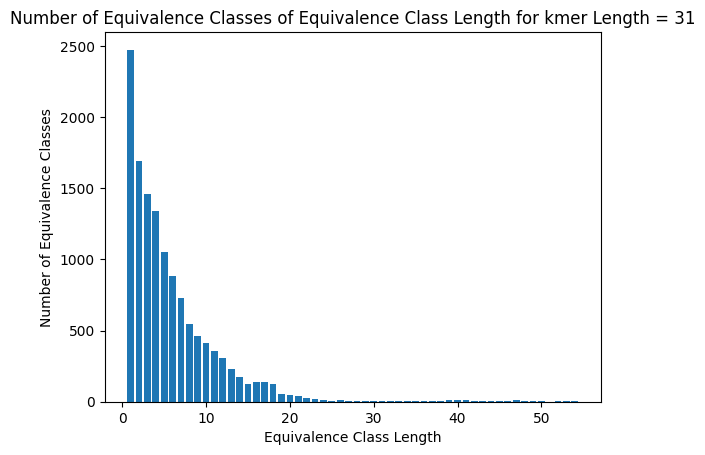

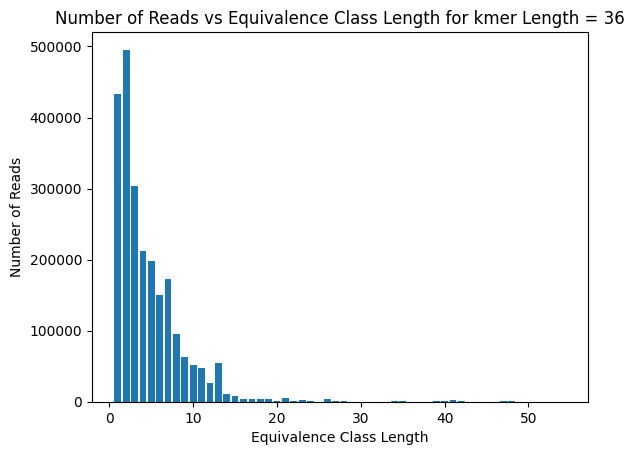

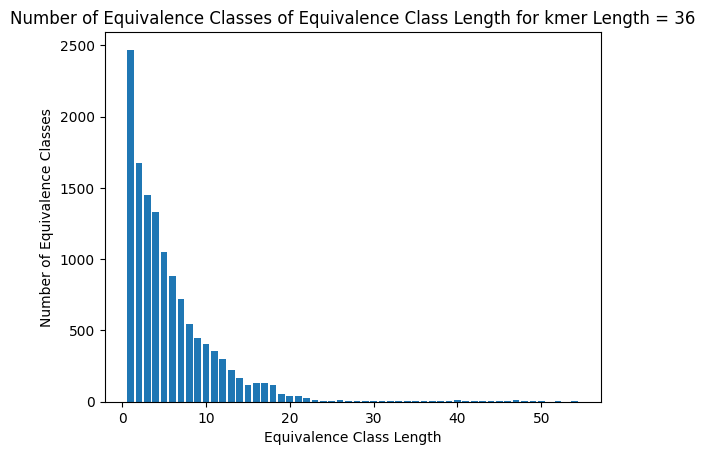

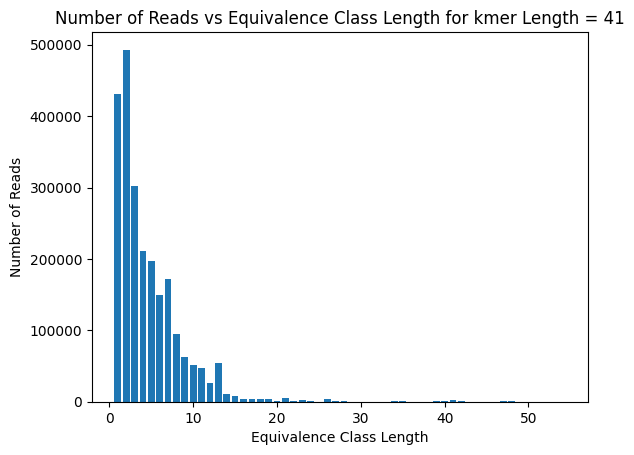

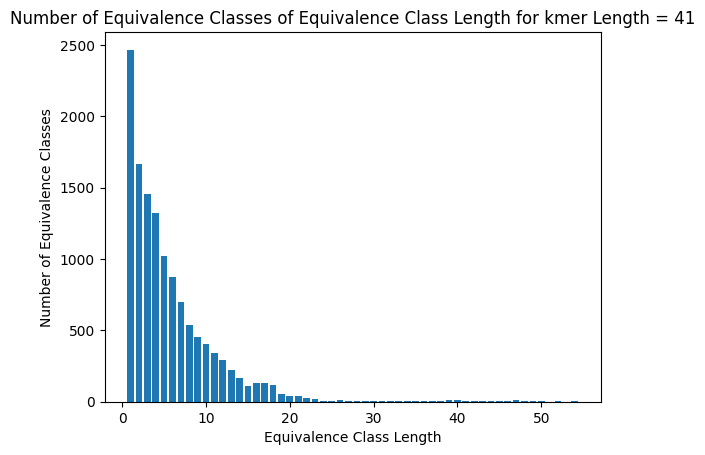

In [120]:
for fig, (kmer_len, stat) in zip(range(0, 12, 2), stats.items()):
    keys = []
    reads = []
    counts = []
    for key, value in stat['num_equiv_classes_dict'].items():
        keys.append(key)
        counts.append(value['count'])
        reads.append(value['reads'])
    create_histogram(fig, keys, reads, "Equivalence Class Length", "Number of Reads", "Number of Reads vs Equivalence Class Length for kmer Length = " + str(kmer_len))
    create_histogram(fig + 1, keys, counts, "Equivalence Class Length", "Number of Equivalence Classes", "Number of Equivalence Classes of Equivalence Class Length for kmer Length = " + str(kmer_len))
